# Sales Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

In [3]:
# Import all monthl files into Jupyter Notebook

file_location = 'C:\\Users\\ragir\\OneDrive\\Desktop\\DATA ANALYTICS\\Portfolio Projects\\Sales Analysis\\'

df1 = pd.read_excel(file_location + 'Sales_January_2019.xlsx')
df2 = pd.read_excel(file_location + 'Sales_February_2019.xlsx')
df3 = pd.read_excel(file_location + 'Sales_March_2019.xlsx')
df4 = pd.read_excel(file_location + 'Sales_April_2019.xlsx')
df5 = pd.read_excel(file_location + 'Sales_May_2019.xlsx')
df6 = pd.read_excel(file_location + 'Sales_June_2019.xlsx')
df7 = pd.read_excel(file_location + 'Sales_July_2019.xlsx')
df8 = pd.read_excel(file_location + 'Sales_August_2019.xlsx')
df9 = pd.read_excel(file_location + 'Sales_September_2019.xlsx')
df10 = pd.read_excel(file_location + 'Sales_October_2019.xlsx')
df11 = pd.read_excel(file_location + 'Sales_November_2019.xlsx')
df12 = pd.read_excel(file_location + 'Sales_December_2019.xlsx')

In [4]:
# Merging all the data

sales_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0, ignore_index=True)

In [5]:
# View the top 5 of the merged data

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [6]:
# View the bottom 5 of the merged data

sales_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186845,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186846,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186847,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"
186848,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001"


In [7]:
# Check data info, data types

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
# Check for NULL rows

sales_data.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

In [9]:
# Drop all NULLs from dataframe

sales_data.dropna(inplace=True)

In [10]:
# Check for NULL rows
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
# Check for rows that have column titles as sales data

sales_data[sales_data['Order ID'] == 'Order ID']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185069,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185480,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185924,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
# Get the index of the rows with column titles
index_names = sales_data[sales_data['Order ID'] == 'Order ID'].index

# Drop the rows
sales_data.drop(index_names, inplace=True)


In [13]:
# Change order ID, Quantity Ordered, Price Each, Order Date columns datatype

sales_data['Order ID'] = sales_data['Order ID'].astype('int64')
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int64')
sales_data['Price Each'] = sales_data['Price Each'].astype('float')
sales_data['Order Date'] = sales_data['Order Date'].astype('datetime64')

In [14]:
# Check data info, data types

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [15]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [17]:
# Create new column for total price (Quantity Ordered * Price Each)

sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

In [18]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Amount,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,11.99


In [23]:
# Create a new column for day of week from the Order Date column

sales_data['Day_of_Week'] = sales_data['Order Date'].dt.day_name()
sales_data.Day_of_Week.head()

0     Tuesday
1      Monday
2    Thursday
3    Saturday
4      Friday
Name: Day_of_Week, dtype: object

In [24]:
# Create a new column for day of week from the Order Date column

sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data.Month.head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [25]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Amount,Sales,Day_of_Week,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,700.00,Tuesday,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,14.95,Monday,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,23.98,Thursday,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,149.99,Saturday,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,11.99,Friday,1


In [26]:
# Create a new column for city from the Purchase Address column

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [27]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Amount,Sales,Day_of_Week,Month,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,700.00,Tuesday,1,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,14.95,Monday,1,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,23.98,Thursday,1,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,149.99,Saturday,1,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,11.99,Friday,1,Austin


In [28]:
sales_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Amount,Sales,Day_of_Week,Month,City
186844,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,14.95,Wednesday,12,San Francisco
186845,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,7.68,Sunday,12,Los Angeles
186846,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,400.00,Monday,12,Seattle
186847,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,11.99,Tuesday,12,Dallas
186848,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",99.99,99.99,Saturday,12,Los Angeles


In [29]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Total Amount      185950 non-null  float64       
 7   Sales             185950 non-null  float64       
 8   Day_of_Week       185950 non-null  object        
 9   Month             185950 non-null  int64         
 10  City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 17.0+ MB


In [30]:
# Convert Day_of_Week and Month_Name into categorical datatype

sales_data['Day_of_Week'] = sales_data['Day_of_Week'].astype('category')
sales_data['Month'] = sales_data['Month'].astype('category')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Total Amount      185950 non-null  float64       
 7   Sales             185950 non-null  float64       
 8   Day_of_Week       185950 non-null  category      
 9   Month             185950 non-null  category      
 10  City              185950 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 14.5+ MB


In [31]:
# Check for duplicate values in the dataset
# Check for duplicate Order IDs
duplicate_order_ids = sales_data[sales_data['Order ID'].duplicated()]

if duplicate_order_ids.empty:
    print("There are no duplicate Order IDs.")
else:
    print("Duplicate Order IDs:")
    print(duplicate_order_ids)


Duplicate Order IDs:
        Order ID                     Product  Quantity Ordered  Price Each  \
42        141275            Wired Headphones                 1       11.99   
58        141290       AA Batteries (4-pack)                 3        3.84   
134       141365            Wired Headphones                 1       11.99   
154       141384        USB-C Charging Cable                 1       11.95   
221       141450  Bose SoundSport Headphones                 1       99.99   
...          ...                         ...               ...         ...   
186710    319536            Wired Headphones                 1       11.99   
186731    319556            Wired Headphones                 1       11.99   
186760    319584            Wired Headphones                 1       11.99   
186773    319596    Lightning Charging Cable                 1       14.95   
186809    319631    Lightning Charging Cable                 1       14.95   

                Order Date                

In [32]:
# Drop the duplicate data

sales_data.drop_duplicates(subset='Order ID', inplace=True)



In [33]:
sales_data.shape

(178437, 11)

# Data Exploration

#### What are the total Orders from January to December and Sales?

In [34]:

total_orders = sales_data['Order ID'].count()
sum_of_sales = sales_data['Sales'].sum()

print(total_orders)
print(sum_of_sales)


178437
33671599.46999999


#### How many Product types were sold?

In [35]:
product_count = sales_data['Product'].nunique()

product_name = sales_data['Product'].unique()

print(product_count)
print(product_name)


19
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']


#### What is the monthly breakdown for the total orders and sales

In [36]:

sales_data.groupby('Month').agg({'Order ID':'count', 'Sales':'sum'})



,Order ID,Sales
Month,,
1,9293,1782214.90
2,11496,2146232.20
3,14549,2739938.02
4,17528,3308277.50
5,15836,3075410.70
6,12989,2516633.11
7,13761,2584388.35
8,11484,2192824.44
9,11202,2048845.16


#### Plot to show monthly distribution of the orders and sales

range(1, 13)


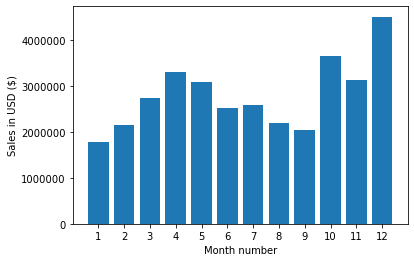

In [37]:
months = range(1,13)
print(months)

plt.bar(months,sales_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.ticklabel_format(style = 'plain')
plt.show()

#### What City sold the most product?

In [38]:
sales_data.groupby('City').agg({'Order ID':'count', 'Sales':'sum'})


,Order ID,Sales
City,,
Atlanta,14253,2721689.32
Austin,9509,1787851.98
Boston,19092,3576754.73
Dallas,14240,2702230.45
Los Angeles,28498,5310846.93
New York City,23848,4567165.01
Portland,11980,2267084.04
San Francisco,42898,8055046.60
Seattle,14119,2682930.41


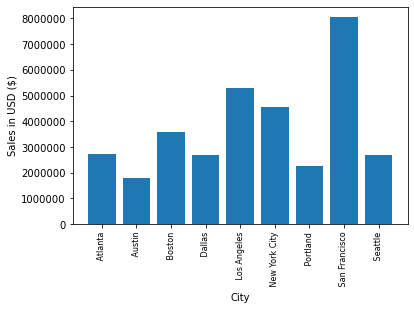

In [39]:

keys = [city for city, df in sales_data.groupby(['City'])]

plt.bar(keys,sales_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.ticklabel_format(style = 'plain', axis = 'y')

plt.show()

#### How do sales perform throughout the hours of the day?

In [40]:
# Add hour column in the dataframe from the Order Date Column
sales_data['Hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour
sales_data['Minute'] = pd.to_datetime(sales_data['Order Date']).dt.minute
sales_data['Count'] = 1
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Amount,Sales,Day_of_Week,Month,City,Hour,Minute,Count
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,700.00,Tuesday,1,Boston,21,25,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,14.95,Monday,1,Portland,14,15,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,23.98,Thursday,1,San Francisco,13,33,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,149.99,Saturday,1,Los Angeles,20,33,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,11.99,Friday,1,Austin,11,59,1


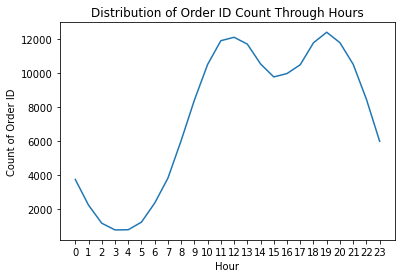

In [41]:
# Show sales distribution before 
# Group data by Order Hour and count unique Order ID
hourly_orders = sales_data.groupby('Hour')['Order ID'].nunique()

# Create line plot
plt.plot(hourly_orders.index, hourly_orders.values)
plt.xlabel('Hour')
plt.ylabel('Count of Order ID')
plt.title('Distribution of Order ID Count Through Hours')
plt.xticks(range(24))
plt.show()


# The best time to market products through advertisements and promotions would be when the orders are steadily increasing, to take maximize on the already increasing order numbers,so between 0900 hours to 1200 hours and between 1700 hours to 1900 hours 

#### What was the total orders versus total sales per Product?

In [74]:
# Calculate total orders (Order IDs) per Product throughout the year

sales_per_item = sales_data.groupby('Product')['Order ID'].count()
sales_per_item = sales_per_item.sort_index()
sales_per_item

Product
20in Monitor                   4022
27in 4K Gaming Monitor         6104
27in FHD Monitor               7352
34in Ultrawide Monitor         6056
AA Batteries (4-pack)         20205
AAA Batteries (4-pack)        20223
Apple Airpods Headphones      14910
Bose SoundSport Headphones    12767
Flatscreen TV                  4701
Google Phone                   5416
LG Dryer                        633
LG Washing Machine              653
Lightning Charging Cable      20252
Macbook Pro Laptop             4624
ThinkPad Laptop                4036
USB-C Charging Cable          20174
Vareebadd Phone                2027
Wired Headphones              17560
iPhone                         6722
Name: Order ID, dtype: int64

In [75]:
# Calculate total sales per Product throughout the year

sales_per_item = sales_data.groupby('Product')['Sales'].sum()
sales_per_item = sales_per_item.sort_index()
sales_per_item

Product
20in Monitor                   445349.51
27in 4K Gaming Monitor        2385958.82
27in FHD Monitor              1108876.07
34in Ultrawide Monitor        2307679.27
AA Batteries (4-pack)          104202.24
AAA Batteries (4-pack)          90812.28
Apple Airpods Headphones      2252400.00
Bose SoundSport Headphones    1289271.06
Flatscreen TV                 1415700.00
Google Phone                  3253800.00
LG Dryer                       379800.00
LG Washing Machine             391800.00
Lightning Charging Cable       324639.25
Macbook Pro Laptop            7867600.00
ThinkPad Laptop               4037959.62
USB-C Charging Cable           264202.55
Vareebadd Phone                812000.00
Wired Headphones               229248.80
iPhone                        4710300.00
Name: Sales, dtype: float64

#### Plot to show total orders versus total sales per Product

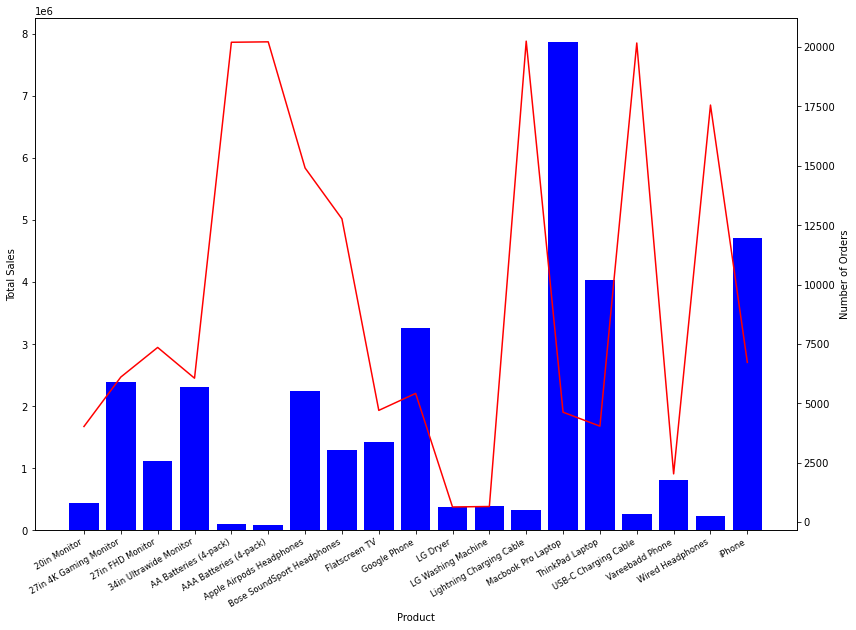

In [80]:
# Plot a combined bar and line graph to show total orders versus total sales per Product

sales_per_item = sales_data.groupby('Product')['Order ID'].count()
sales_per_item = sales_per_item.sort_index()

sales_per_item_sales = sales_data.groupby('Product')['Sales'].sum()
sales_per_item_sales = sales_per_item_sales.sort_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(sales_per_item_sales.index, sales_per_item_sales.values, color='b', label='Total Sales')
ax2 = ax.twinx()
ax2.plot(sales_per_item.index, sales_per_item.values, color='r', label='Number of Orders')

ax.set_xlabel('Product')
ax.set_ylabel('Total Sales')
ax2.set_ylabel('Number of Orders')

# plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.tight_layout()
plt.setp(ax.get_xticklabels(), rotation = 30, horizontalalignment='right', fontsize='small')


plt.show()

#### How does price compare with the total order and total sales generated from each Product?

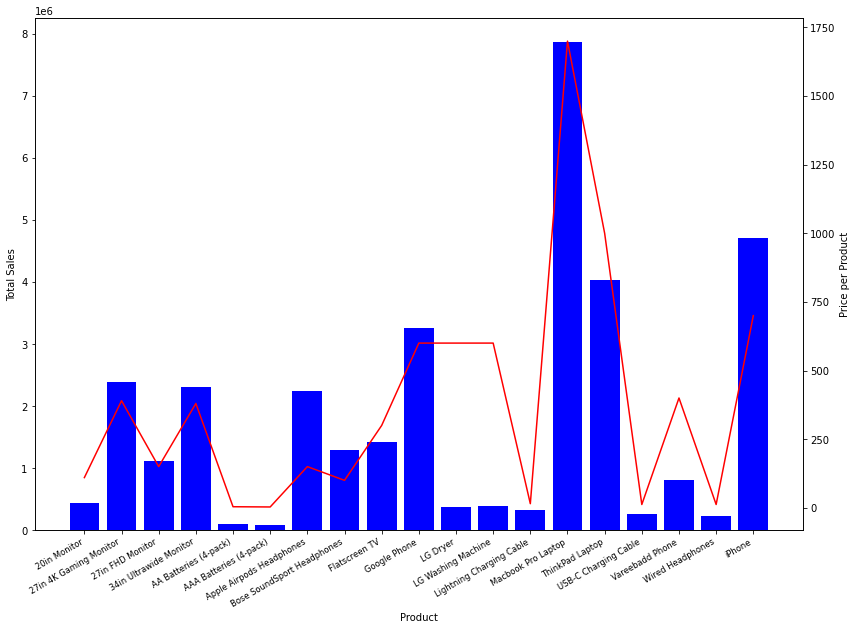

In [83]:
sales_per_item = sales_data.groupby('Product')['Price Each'].unique()
sales_per_item = sales_per_item.sort_index()

sales_per_item_sales = sales_data.groupby('Product')['Sales'].sum()
sales_per_item_sales = sales_per_item_sales.sort_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(sales_per_item_sales.index, sales_per_item_sales.values, color='b', label='Total Sales')
ax2 = ax.twinx()
ax2.plot(sales_per_item.index, sales_per_item.values, color='r', label='Price Each')

ax.set_xlabel('Product')
ax.set_ylabel('Total Sales')
ax2.set_ylabel('Price per Product')

# plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.tight_layout()
plt.setp(ax.get_xticklabels(), rotation = 30, horizontalalignment='right', fontsize='small')


plt.show()

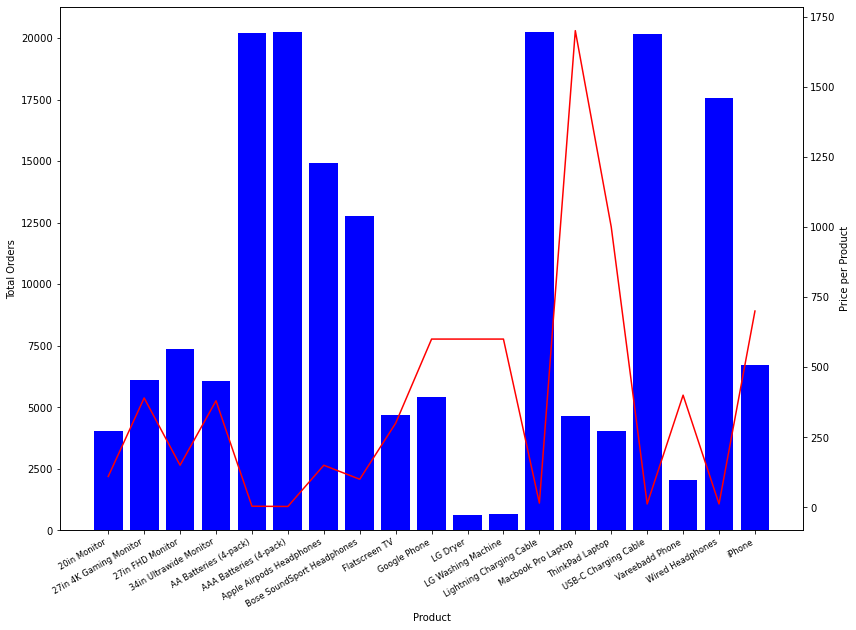

In [84]:
sales_per_item = sales_data.groupby('Product')['Price Each'].unique()
sales_per_item = sales_per_item.sort_index()

sales_per_item_sales = sales_data.groupby('Product')['Order ID'].count()
sales_per_item_sales = sales_per_item_sales.sort_index()

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(sales_per_item_sales.index, sales_per_item_sales.values, color='b', label='Total Sales')
ax2 = ax.twinx()
ax2.plot(sales_per_item.index, sales_per_item.values, color='r', label='Price Each')

ax.set_xlabel('Product')
ax.set_ylabel('Total Orders')
ax2.set_ylabel('Price per Product')

# plt.xticks(rotation=90)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.tight_layout()
plt.setp(ax.get_xticklabels(), rotation = 30, horizontalalignment='right', fontsize='small')


plt.show()

The above plots comparing Price per product versus Sales generated from each product and Price per product versus Total orders per Product show that the most expensive products generated most sales despite having less ordered quantities as compared to the cheaper products.
This means that the company should prioritize on increasing sales of the cheaper products by complementing these products with others that go along/might need to use the cheaper products

